In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
path='data.csv'

data=pd.read_csv(path)
data.head()
mapping={'M':1, 'B':0}
data['diagnosis']=data['diagnosis'].map(mapping)
data = data.fillna(0)

data.head()
data.isnull().sum()
x=data.drop(columns='diagnosis', axis=1)
y=data['diagnosis']
print(x)
print(y)

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train, y_train)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

C:\Users\labou\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
print(x)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [42]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [3]:
x_train_p=model.predict(x_train)
ac=accuracy_score(y_train, x_train_p)
print(ac)

0.9120879120879121


[0]


C:\Users\labou\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


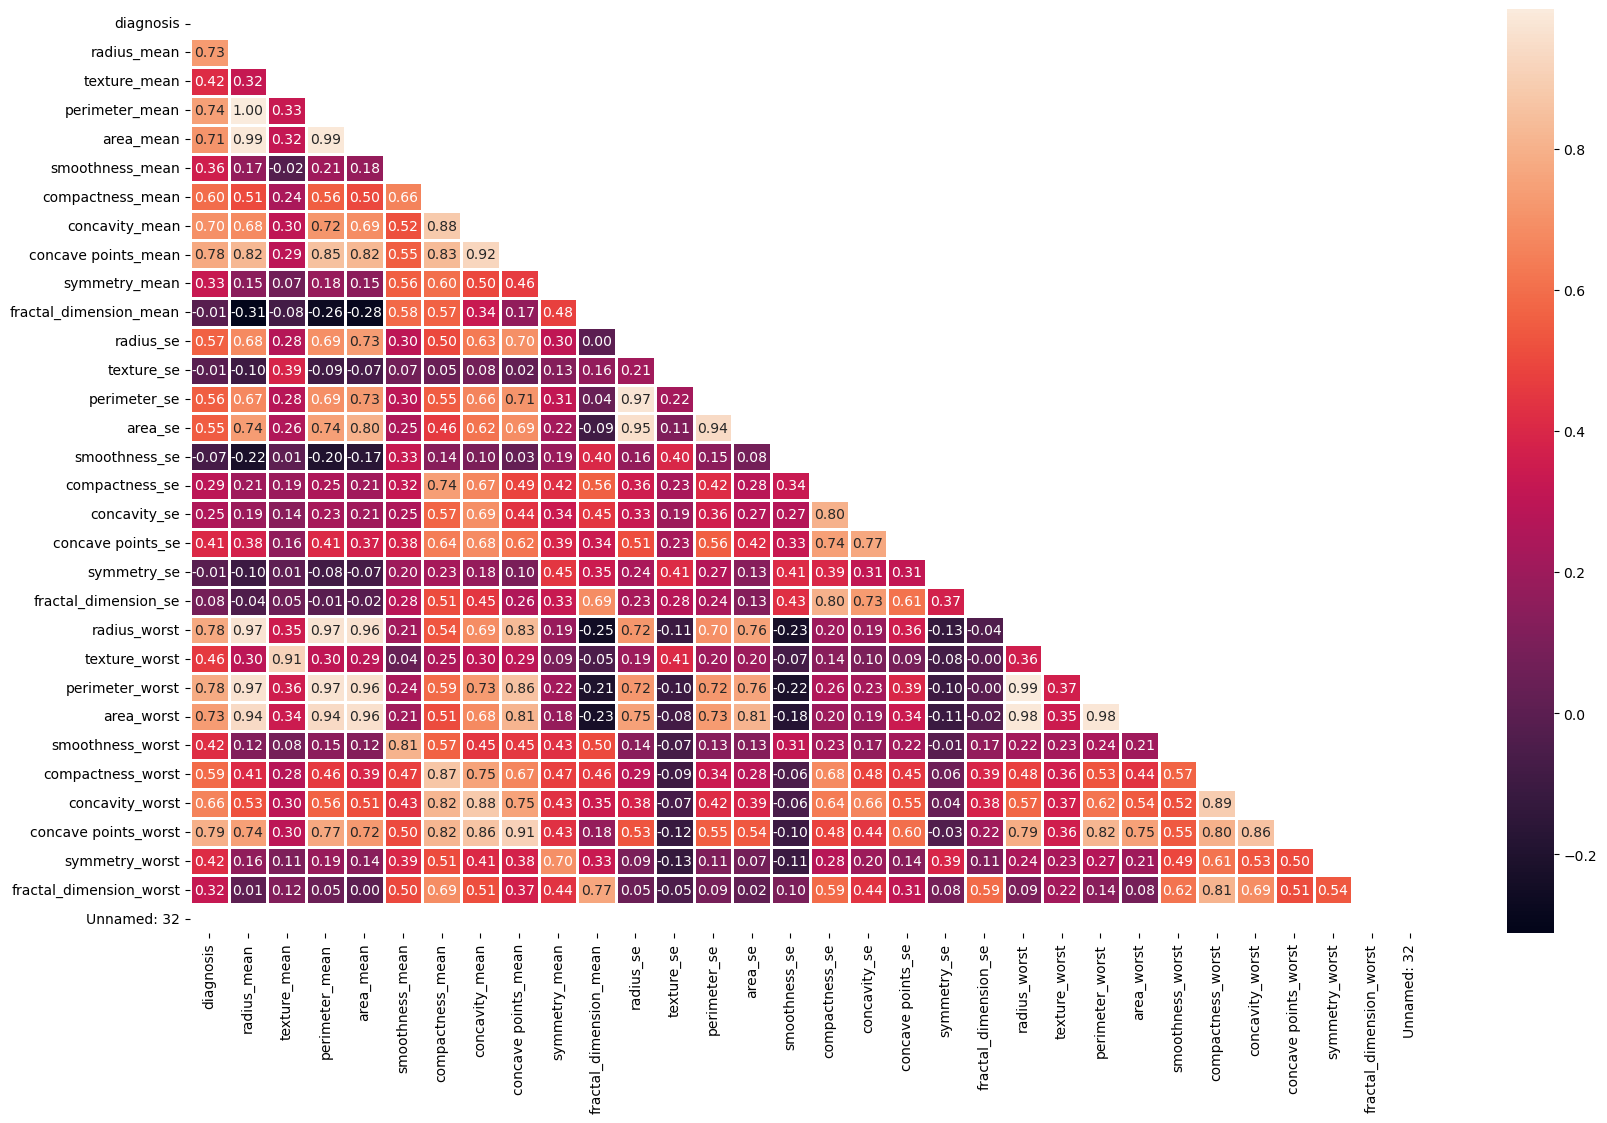

Remaining features: 24
Training accuracy: 0.9516483516483516
Testing accuracy: 0.956140350877193
Confusion Matrix:
[[70  1]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data
path = 'data.csv'
data = pd.read_csv(path)

# Map the 'diagnosis' column to numerical values
mapping = {'M': 1, 'B': 0}
data['diagnosis'] = data['diagnosis'].map(mapping)

# Fill any missing values with 0
data = data.fillna(0)

# Drop the 'id' column
data.drop('id', axis=1, inplace=True)

# Split features and target variable
x = data.drop(columns='diagnosis', axis=1)
y = data['diagnosis']

# Plot the correlation matrix
plt.figure(figsize=(20, 12))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Compute and apply correlation-based feature selection
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_data = corr_matrix.mask(mask)

# Find and drop highly correlated features
to_drop = [x for x in tri_data.columns if any(tri_data[x] > 0.92)]
data = data.drop(to_drop, axis=1)

# Print the number of remaining features
print(f"Remaining features: {data.shape[1]}")

# Update features and target variable after dropping highly correlated features
x = data.drop(columns='diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Added max_iter to ensure convergence
model.fit(x_train, y_train)

# Make predictions and evaluate the model
x_train_p = model.predict(x_train)
ac = accuracy_score(y_train, x_train_p)
print(f"Training accuracy: {ac}")

x_test_p = model.predict(x_test)
actest = accuracy_score(y_test, x_test_p)
print(f"Testing accuracy: {actest}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, x_test_p))

print("Classification Report:")
print(classification_report(y_test, x_test_p))


In [14]:
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model, file)